In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import matplotlib.dates as mdates
%matplotlib inline

#### Returns Plots

In [2]:
df = pd.read_csv(r'returns_60.csv')

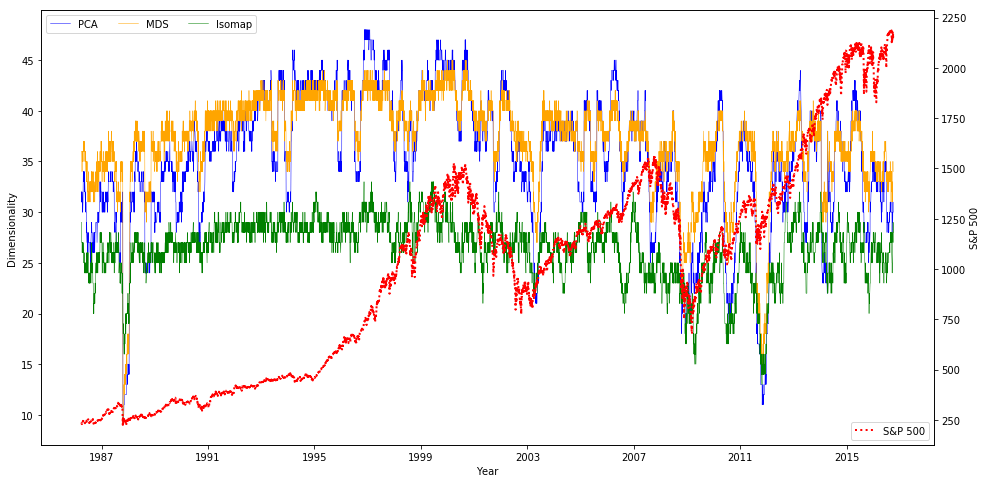

In [3]:
ts = pd.to_datetime(df['Dates'], format='%m/%d/%Y')

fig, ax1 = plt.subplots(figsize=(16,8))
ax2 = ax1.twinx()

l1 = ax1.plot(ts, df['PCA_EIG_DIMS'], color='blue', label='PCA', linewidth=0.5)
l2 = ax1.plot(ts, df['MDS_EIG_DIMS'], color='orange', label='MDS', linewidth=0.5)
l3 = ax1.plot(ts, df['ISO_EIG_DIMS'], color='green', label='Isomap', linewidth=0.5)
ax1.legend(loc='upper left', ncol=3, prop={'size': 10})

l4 = ax2.plot(ts, df['SP500'], color='red', label='S&P 500', linewidth=2.0, linestyle=':')
ax2.legend(loc='lower right', prop={'size': 10})

ax1.set_xlabel('Year')
ax1.set_ylabel('Dimensionality')
ax2.set_ylabel('S&P 500')

plt.show()

In [4]:
fig.savefig(r'C:\workspace\nldr\docs\dim_detect_finance\images\first_order_pca_mds_iso.png')

#### Autoencoder and Isomap - $1^{st}$ order

In [5]:
df = pd.read_csv(r'first_order_dd_results.csv')

In [6]:
df.head()

Dates  PCA  MDS  ISOMAP  Autoencoder  S&P 500
0  4/1/1986   51   46      34           18   235.14
1  4/2/1986   51   46      33           18   235.71
2  4/3/1986   51   46      33           16   232.47
3  4/4/1986   51   45      32           15   228.69
4  4/7/1986   50   44      32           20   228.63

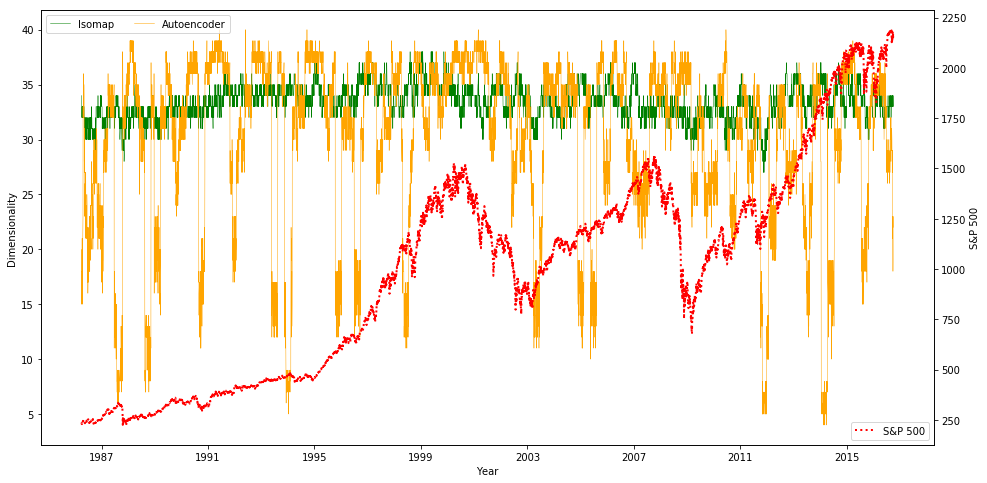

In [8]:
ts = pd.to_datetime(df['Dates'], format='%m/%d/%Y')

fig, ax1 = plt.subplots(figsize=(16,8))
ax2 = ax1.twinx()

# l1 = ax1.plot(ts, df['PCA_EIG_DIMS'], color='blue', label='PCA', linewidth=0.5)
# l2 = ax1.plot(ts, df['MDS_EIG_DIMS'], color='orange', label='MDS', linewidth=0.5)
l3 = ax1.plot(ts, df['ISOMAP'], color='green', label='Isomap', linewidth=0.5)
l4 = ax1.plot(ts, df['Autoencoder'], color='orange', label='Autoencoder', linewidth=0.5)
ax1.legend(loc='upper left', ncol=3, prop={'size': 10})

l5 = ax2.plot(ts, df['S&P 500'], color='red', label='S&P 500', linewidth=2.0, linestyle=':')
ax2.legend(loc='lower right', prop={'size': 10})

ax1.set_xlabel('Year')
ax1.set_ylabel('Dimensionality')
ax2.set_ylabel('S&P 500')

plt.show()

#### Autoencoder and Isomap for KLD Divergence

In [46]:
df = pd.read_csv(r'russell3K_KLD_AE.csv')
df.head()

Dates  PCA_SVD_DIMS  MDS_SVD_DIMS  ISO_SVD_DIMS  AE_1E5_GTE_1PCT  \
0  4/1/1986          35.0          38.0          23.0               15   
1  4/2/1986          35.0          38.0          22.0               11   
2  4/3/1986          35.0          39.0          22.0               13   
3  4/4/1986          35.0          39.0          22.0               15   
4  4/7/1986          36.0          39.0          21.0               12   

   AE_1E5_UPTO_90PCT  AE_1E6_GTE_1PCT  AE_1E6_UPTO_90PCT  AE_1E7_GTE_1PCT  \
0                 10               22                 17               24   
1                  8               22                 16               28   
2                 10               26                 22               28   
3                 10               25                 21               26   
4                  9               24                 20               26   

   AE_1E7_UPTO_90PCT   SP500  
0                 20  235.14  
1                 24  235.71  
2                 23  232.47  
3                 22  228.69  
4                 21  228.63

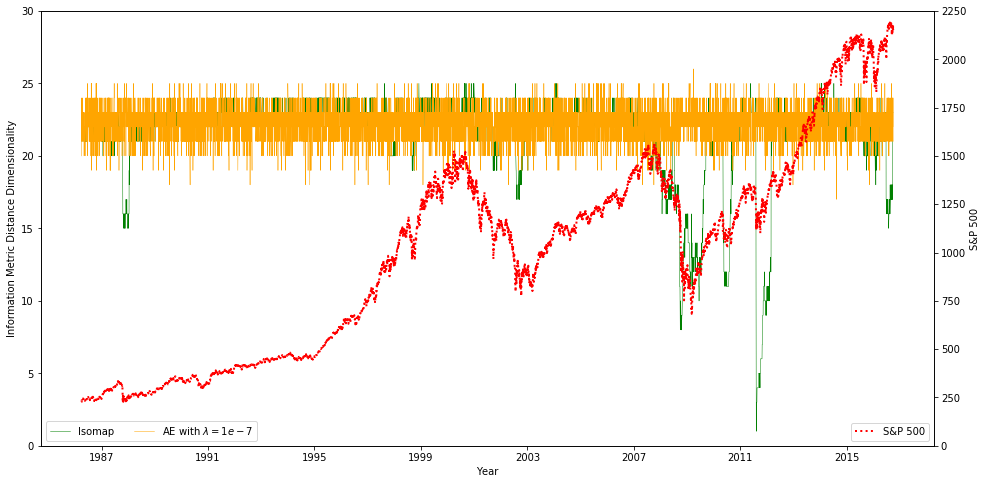

In [43]:
ts = pd.to_datetime(df['Dates'], format='%m/%d/%Y')

fig, ax1 = plt.subplots(figsize=(16,8))
ax2 = ax1.twinx()

# l1 = ax1.plot(ts, df['PCA_EIG_DIMS'], color='blue', label='PCA', linewidth=0.5)
# l2 = ax1.plot(ts, df['MDS_EIG_DIMS'], color='orange', label='MDS', linewidth=0.5)
l3 = ax1.plot(ts, df['ISO_SVD_DIMS'], color='green', label='Isomap', linewidth=0.5)
l4 = ax1.plot(ts, df['AE_1E7_UPTO_90PCT'], color='orange', label='AE with $\lambda = 1e-7$', linewidth=0.5)
# l4 = ax1.plot(ts, df['AE_1E7_UPTO_90PCT'], color='purple', label='Autoencoder1', linewidth=0.5)
ax1.legend(loc='lower left', ncol=3, prop={'size': 10})
ax1.set_ylim(0,30)

l5 = ax2.plot(ts, df['SP500'], color='red', label='S&P 500', linewidth=2.0, linestyle=':')
ax2.legend(loc='lower right', prop={'size': 10})
ax2.set_ylim(0, 2250)

ax1.set_xlabel('Year')
ax1.set_ylabel('Information Metric Distance Dimensionality')
ax2.set_ylabel('S&P 500')

plt.show()

Plot different lambdas

In [55]:
ts = pd.to_datetime(df['Dates'], format='%m/%d/%Y')

fig, ax1 = plt.subplots(figsize=(16,8))
ax2 = ax1.twinx()

l1 = ax1.plot(ts, df['AE_1E5_UPTO_90PCT'], color='darkgray', label='$\lambda = 1e-5$', linewidth=0.5)
l2 = ax1.plot(ts, df['AE_1E6_UPTO_90PCT'], color='magenta', label='$\lambda = 1e-6$', linewidth=0.5)
l3 = ax1.plot(ts, df['AE_1E7_UPTO_90PCT'], color='orange', label='$\lambda = 1e-7$', linewidth=0.5)

ax1.legend(loc='lower left', ncol=3, prop={'size': 10})
ax1.set_ylim(0,30)

l4 = ax2.plot(ts, df['SP500'], color='red', label='S&P 500', linewidth=2.0, linestyle=':')
ax2.legend(loc='lower right', prop={'size': 10})
ax2.set_ylim(0, 2250)

ax1.set_xlabel('Year')
ax1.set_ylabel('Information Metric Distance Dimensionality')
ax2.set_ylabel('S&P 500')

plt.show()

In [49]:
ts = pd.to_datetime(df['Dates'], format='%m/%d/%Y')

fig, ax1 = plt.subplots(figsize=(16,8))
ax2 = ax1.twinx()

l1 = ax1.plot(ts, df['AE_1E5_GTE_1PCT'], color='orange', label='$\lambda = 1e-5$', linewidth=0.5)
l2 = ax1.plot(ts, df['AE_1E6_GTE_1PCT'], color='brown', label='$\lambda = 1e-6$', linewidth=0.5)
l3 = ax1.plot(ts, df['AE_1E7_GTE_1PCT'], color='black', label='$\lambda = 1e-7$', linewidth=0.5)

ax1.legend(loc='lower left', ncol=3, prop={'size': 10})
ax1.set_ylim(0,30)

l4 = ax2.plot(ts, df['SP500'], color='red', label='S&P 500', linewidth=2.0, linestyle=':')
ax2.legend(loc='lower right', prop={'size': 10})
ax2.set_ylim(0, 2250)

ax1.set_xlabel('Year')
ax1.set_ylabel('Information Metric Distance Dimensionality')
ax2.set_ylabel('S&P 500')

plt.show()

In [24]:
plt.savefig('russell3k_iso_ae_kld.png')

### Autoencoder and Isomap for Euclidean Distances

In [56]:
df = pd.read_csv(r'russell3K_EUCLIDEAN_AE.csv')
df.head()

Dates  PCA_SVD_DIMS  MDS_SVD_DIMS  ISO_SVD_DIMS  PCA_EIG_DIMS  \
0  4/1/1986            49            43            27            40   
1  4/2/1986            49            43            27            40   
2  4/3/1986            49            43            26            40   
3  4/4/1986            49            42            26            40   
4  4/7/1986            49            43            26            40   

   MDS_EIG_DIMS  ISO_EIG_DIMS  PCA_SVD_GT_1PCT  MDS_SVD_GT_1PCT  \
0            35            23               51               46   
1            35            23               51               46   
2            35            22               51               46   
3            35            22               51               47   
4            35            22               50               47   

   ISO_SVD_GT_1PCT  AE_1E5_GTE_1PCT  AE_1E5_UPTO_90PCT  AE_1E6_GTE_1PCT  \
0               34               13                  9               21   
1               33               11                  9               22   
2               33               12                  9               22   
3               32               12                  9               25   
4               32               12                  9               25   

   AE_1E6_UPTO_90PCT  AE_1E7_GTE_1PCT  AE_1E7_UPTO_90PCT       SP500  
0                 18               27                 21  235.139999  
1                 19               23                 20  235.710007  
2                 18               25                 21  232.470001  
3                 20               27                 23  228.690002  
4                 20               27                 22  228.630005

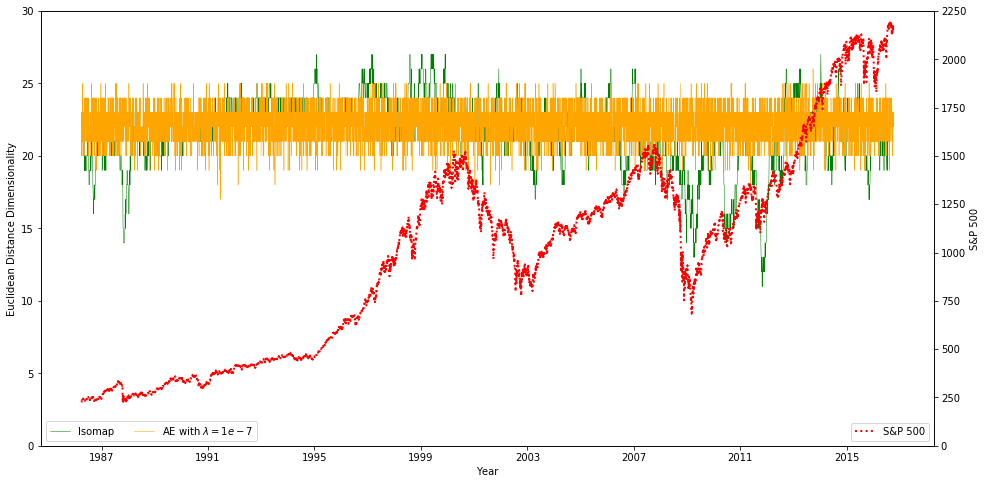

In [45]:
ts = pd.to_datetime(df['Dates'], format='%m/%d/%Y')

fig, ax1 = plt.subplots(figsize=(16,8))
ax2 = ax1.twinx()

# l1 = ax1.plot(ts, df['PCA_EIG_DIMS'], color='blue', label='PCA', linewidth=0.5)
# l2 = ax1.plot(ts, df['MDS_EIG_DIMS'], color='orange', label='MDS', linewidth=0.5)
l3 = ax1.plot(ts, df['ISO_EIG_DIMS'], color='green', label='Isomap', linewidth=0.5)
l4 = ax1.plot(ts, df['AE_1E7_UPTO_90PCT'], color='orange', label='AE with $\lambda = 1e-7$', linewidth=0.5)
# l4 = ax1.plot(ts, df['AE_1E7_UPTO_90PCT'], color='purple', label='Autoencoder1', linewidth=0.5)
ax1.legend(loc='lower left', ncol=3, prop={'size': 10})
ax1.set_ylim(0,30)

l5 = ax2.plot(ts, df['SP500'], color='red', label='S&P 500', linewidth=2.0, linestyle=':')
ax2.legend(loc='lower right', prop={'size': 10})
ax2.set_ylim(0, 2250)

ax1.set_xlabel('Year')
ax1.set_ylabel('Euclidean Distance Dimensionality')
ax2.set_ylabel('S&P 500')

plt.show()

Different lambdas for Euclidean Distance

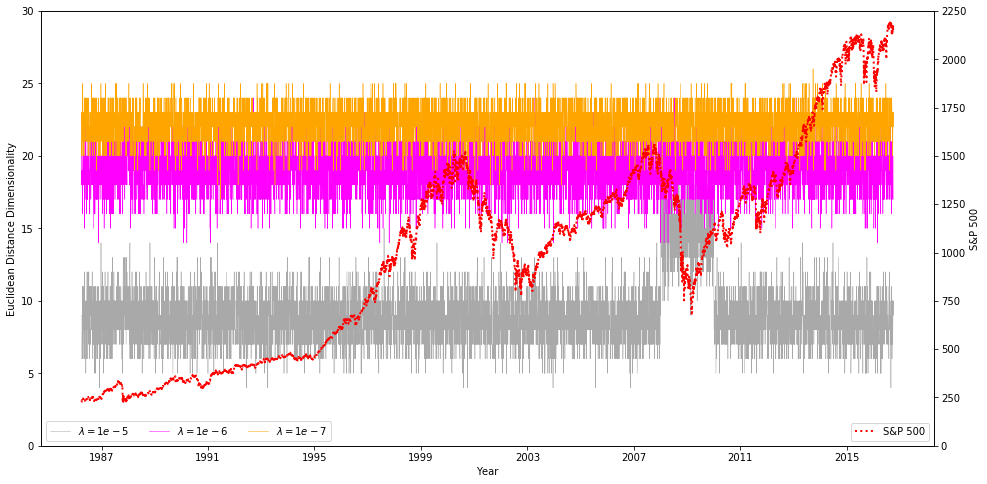

In [59]:
df = pd.read_csv(r'russell3K_EUCLIDEAN_AE.csv')

ts = pd.to_datetime(df['Dates'], format='%m/%d/%Y')

fig, ax1 = plt.subplots(figsize=(16,8))
ax2 = ax1.twinx()

l1 = ax1.plot(ts, df['AE_1E5_UPTO_90PCT'], color='darkgray', label='$\lambda = 1e-5$', linewidth=0.5)
l2 = ax1.plot(ts, df['AE_1E6_UPTO_90PCT'], color='magenta', label='$\lambda = 1e-6$', linewidth=0.5)
l3 = ax1.plot(ts, df['AE_1E7_UPTO_90PCT'], color='orange', label='$\lambda = 1e-7$', linewidth=0.5)

ax1.legend(loc='lower left', ncol=3, prop={'size': 10})
ax1.set_ylim(0,30)

l4 = ax2.plot(ts, df['SP500'], color='red', label='S&P 500', linewidth=2.0, linestyle=':')
ax2.legend(loc='lower right', prop={'size': 10})
ax2.set_ylim(0, 2250)

ax1.set_xlabel('Year')
ax1.set_ylabel('Euclidean Distance Dimensionality')
ax2.set_ylabel('S&P 500')

plt.show()

### Euclidean

In [2]:
df = pd.read_csv(r'euclidean_60.csv')

df['PCA_EIG_RM'] = df['PCA_EIG_DIMS'].rolling(window=30).mean()
df['MDS_EIG_RM'] = df['MDS_EIG_DIMS'].rolling(window=30).mean()
df['ISO_EIG_RM'] = df['ISO_EIG_DIMS'].rolling(window=30).mean()

df['PCA_SVD_RM'] = df['PCA_SVD_DIMS'].rolling(window=30).mean()
df['MDS_SVD_RM'] = df['MDS_SVD_DIMS'].rolling(window=30).mean()
df['ISO_SVD_RM'] = df['ISO_SVD_DIMS'].rolling(window=30).mean()
df['SP500_RM'] = df['SP500'].rolling(window=30).mean()

df['PCA_SVD_VAR'] = df['PCA_SVD_DIMS'].rolling(window=30).var()
df['MDS_SVD_VAR'] = df['MDS_SVD_DIMS'].rolling(window=30).var()
df['ISO_SVD_VAR'] = df['ISO_SVD_DIMS'].rolling(window=30).var()

df['PCA_SVD_STD'] = df['PCA_SVD_DIMS'].rolling(window=30).std()
df['MDS_SVD_STD'] = df['MDS_SVD_DIMS'].rolling(window=30).std()
df['ISO_SVD_STD'] = df['ISO_SVD_DIMS'].rolling(window=30).std()

df['PCA_SVD_STD_RM'] = df['PCA_SVD_STD'].rolling(window=30).mean()
df['MDS_SVD_STD_RM'] = df['MDS_SVD_STD'].rolling(window=30).mean()
df['ISO_SVD_STD_RM'] = df['ISO_SVD_STD'].rolling(window=30).mean()

df['PCA_SVD_VAR_RM'] = df['PCA_SVD_VAR'].rolling(window=30).mean()
df['MDS_SVD_VAR_RM'] = df['MDS_SVD_VAR'].rolling(window=30).mean()
df['ISO_SVD_VAR_RM'] = df['ISO_SVD_VAR'].rolling(window=30).mean()

## <font color=red>Non smooth</font> - euclidean with $\sum {\frac{{{SVD}^2}_i}{\sum {{SVD}^2}_i}} >= 90\%$

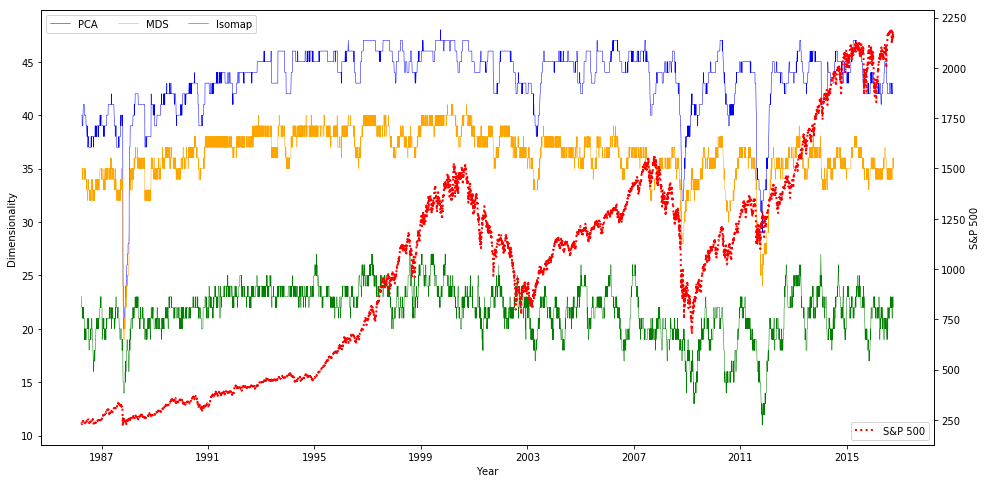

In [3]:
ts = pd.to_datetime(df['Dates'], format='%m/%d/%Y')

fig, ax1 = plt.subplots(figsize=(16,8))
ax2 = ax1.twinx()

l1 = ax1.plot(ts, df['PCA_EIG_DIMS'], color='blue', label='PCA', linewidth=0.5)
l2 = ax1.plot(ts, df['MDS_EIG_DIMS'], color='orange', label='MDS', linewidth=0.5)
l3 = ax1.plot(ts, df['ISO_EIG_DIMS'], color='green', label='Isomap', linewidth=0.5)
ax1.legend(loc='upper left', ncol=3, prop={'size': 10})

l4 = ax2.plot(ts, df['SP500'], color='red', label='S&P 500', linewidth=2.0, linestyle=':')
ax2.legend(loc='lower right', prop={'size': 10})

ax1.set_xlabel('Year')
ax1.set_ylabel('Dimensionality')
ax2.set_ylabel('S&P 500')

plt.show()

## Crash Analysis

#### Black Monday 1987 

In [4]:
df = pd.read_csv(r'euclidean_60.csv')

df['PCA_EIG_RM'] = df['PCA_EIG_DIMS'].rolling(window=30).mean()
df['MDS_EIG_RM'] = df['MDS_EIG_DIMS'].rolling(window=30).mean()
df['ISO_EIG_RM'] = df['ISO_EIG_DIMS'].rolling(window=30).mean()

df['PCA_SVD_RM'] = df['PCA_SVD_DIMS'].rolling(window=30).mean()
df['MDS_SVD_RM'] = df['MDS_SVD_DIMS'].rolling(window=30).mean()
df['ISO_SVD_RM'] = df['ISO_SVD_DIMS'].rolling(window=30).mean()
df['SP500_RM'] = df['SP500'].rolling(window=30).mean()

df['PCA_SVD_VAR'] = df['PCA_SVD_DIMS'].rolling(window=30).var()
df['MDS_SVD_VAR'] = df['MDS_SVD_DIMS'].rolling(window=30).var()
df['ISO_SVD_VAR'] = df['ISO_SVD_DIMS'].rolling(window=30).var()

df['PCA_SVD_STD'] = df['PCA_SVD_DIMS'].rolling(window=30).std()
df['MDS_SVD_STD'] = df['MDS_SVD_DIMS'].rolling(window=30).std()
df['ISO_SVD_STD'] = df['ISO_SVD_DIMS'].rolling(window=30).std()

df['PCA_SVD_STD_RM'] = df['PCA_SVD_STD'].rolling(window=30).mean()
df['MDS_SVD_STD_RM'] = df['MDS_SVD_STD'].rolling(window=30).mean()
df['ISO_SVD_STD_RM'] = df['ISO_SVD_STD'].rolling(window=30).mean()

df['PCA_SVD_VAR_RM'] = df['PCA_SVD_VAR'].rolling(window=30).mean()
df['MDS_SVD_VAR_RM'] = df['MDS_SVD_VAR'].rolling(window=30).mean()
df['ISO_SVD_VAR_RM'] = df['ISO_SVD_VAR'].rolling(window=30).mean()

Black Monday using Euclidean distances

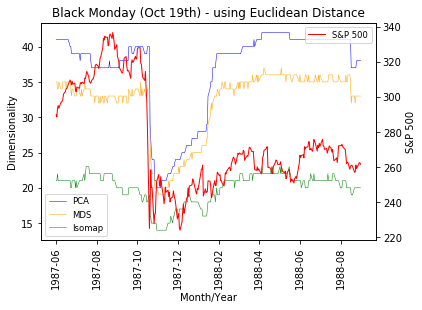

In [21]:
ts = pd.to_datetime(df['Dates'], format='%m/%d/%Y')
# df_new = df[(ts >= datetime.date(1987,6,1)) & (ts <= datetime.date(1988,8,31))]  
df_new = df[(ts >= pd.Timestamp(1987,6,1)) & (ts <= pd.Timestamp(1988,8,31))]  

ts_new = pd.to_datetime(df_new['Dates'], format='%m/%d/%Y')
fig, ax1 = plt.subplots(figsize=(6,4))
ax2 = ax1.twinx()

l1 = ax1.plot(ts_new, df_new['PCA_EIG_DIMS'], color='blue', label='PCA', linewidth=0.5)
l2 = ax1.plot(ts_new, df_new['MDS_EIG_DIMS'], color='orange', label='MDS', linewidth=0.5)
l3 = ax1.plot(ts_new, df_new['ISO_EIG_DIMS'], color='green', label='Isomap', linewidth=0.5) 
ax1.legend(loc='lower left', prop={'size': 8.5})
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%m/%y'))

for tick in ax1.get_xticklabels():
    tick.set_rotation(90)

l4 = ax2.plot(ts_new, df_new['SP500'], color='red', label='S&P 500', linewidth=1.0) #, linestyle=':'
ax2.legend(loc='upper right', prop={'size': 8.5})

ax1.set_title('Black Monday (Oct 19th) - using Euclidean Distance')
ax1.set_xlabel('Month/Year')
ax1.set_ylabel('Dimensionality')
ax2.set_ylabel('S&P 500')

plt.show()

In [6]:
# fig.savefig(r'blk_mon_geo.PNG')

Kullback Leibler Divergence - Black Monday

In [7]:
df_kl = pd.read_csv(r'russell3000_eod_KL_analysis.csv')
df_kl['PCA_SVD_RM'] = df_kl['PCA_SVD_DIMS'].rolling(window=30).mean()
df_kl['MDS_SVD_RM'] = df_kl['MDS_SVD_DIMS'].rolling(window=30).mean()
df_kl['ISO_SVD_RM'] = df_kl['ISO_SVD_DIMS'].rolling(window=30).mean()

df_kl['SP500_RM'] = df_kl['SP500'].rolling(window=30).mean()

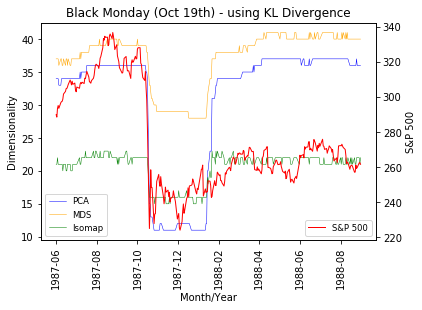

In [22]:
ts = pd.to_datetime(df_kl['Dates'], format='%m/%d/%Y')
# df_new = df_kl[(ts >= datetime.date(1987,6,1)) & (ts <= datetime.date(1988,8,31))]  
df_new = df_kl[(ts >= pd.Timestamp(1987,6,1)) & (ts <= pd.Timestamp(1988,8,31))]  

ts_new = pd.to_datetime(df_new['Dates'], format='%m/%d/%Y')
fig, ax1 = plt.subplots(figsize=(6,4))
ax2 = ax1.twinx()
l1 = ax1.plot(ts_new, df_new['PCA_SVD_DIMS'], color='blue', label='PCA', linewidth=0.5)
l2 = ax1.plot(ts_new, df_new['MDS_SVD_DIMS'], color='orange', label='MDS', linewidth=0.5)
l3 = ax1.plot(ts_new, df_new['ISO_SVD_DIMS'], color='green', label='Isomap', linewidth=0.5)
ax1.legend(loc='lower left', prop={'size': 8.5})
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%m/%y'))

for tick in ax1.get_xticklabels():
    tick.set_rotation(90)
    
l4 = ax2.plot(ts_new, df_new['SP500'], color='red', label='S&P 500', linewidth=1.0) # linestyle=':'
ax2.legend(loc='lower right', prop={'size': 8.5})

ax1.set_title('Black Monday (Oct 19th) - using KL Divergence')
ax1.set_xlabel('Month/Year')
ax1.set_ylabel('Dimensionality')
ax2.set_ylabel('S&P 500')

plt.show()

In [9]:
# fig.savefig(r'blk_mon_kl.PNG')

#### Financial Crisis 

Using Euclidean Distances

In [ ]:
df = pd.read_csv(r'euclidean_60.csv')

df['PCA_EIG_RM'] = df['PCA_EIG_DIMS'].rolling(window=30).mean()
df['MDS_EIG_RM'] = df['MDS_EIG_DIMS'].rolling(window=30).mean()
df['ISO_EIG_RM'] = df['ISO_EIG_DIMS'].rolling(window=30).mean()

df['PCA_SVD_RM'] = df['PCA_SVD_DIMS'].rolling(window=30).mean()
df['MDS_SVD_RM'] = df['MDS_SVD_DIMS'].rolling(window=30).mean()
df['ISO_SVD_RM'] = df['ISO_SVD_DIMS'].rolling(window=30).mean()
df['SP500_RM'] = df['SP500'].rolling(window=30).mean()

df['PCA_SVD_VAR'] = df['PCA_SVD_DIMS'].rolling(window=30).var()
df['MDS_SVD_VAR'] = df['MDS_SVD_DIMS'].rolling(window=30).var()
df['ISO_SVD_VAR'] = df['ISO_SVD_DIMS'].rolling(window=30).var()

df['PCA_SVD_STD'] = df['PCA_SVD_DIMS'].rolling(window=30).std()
df['MDS_SVD_STD'] = df['MDS_SVD_DIMS'].rolling(window=30).std()
df['ISO_SVD_STD'] = df['ISO_SVD_DIMS'].rolling(window=30).std()

df['PCA_SVD_STD_RM'] = df['PCA_SVD_STD'].rolling(window=30).mean()
df['MDS_SVD_STD_RM'] = df['MDS_SVD_STD'].rolling(window=30).mean()
df['ISO_SVD_STD_RM'] = df['ISO_SVD_STD'].rolling(window=30).mean()

df['PCA_SVD_VAR_RM'] = df['PCA_SVD_VAR'].rolling(window=30).mean()
df['MDS_SVD_VAR_RM'] = df['MDS_SVD_VAR'].rolling(window=30).mean()
df['ISO_SVD_VAR_RM'] = df['ISO_SVD_VAR'].rolling(window=30).mean()

##### Load Auto Encoder results

The time stamp and column headers are different.  Don't worry, things change over time. :)

In [66]:
# df_ae = pd.read_csv(r'ae/summary_ae-lambda-1e-8.csv')
df_ae = pd.read_csv(r'ae/summary_rpca_ae.csv')

ma_days = 20
df_ae['GTE 1% MA'] = df_ae['GTE 1%'].rolling(window=ma_days).mean()
df_ae['UPTO 90% MA'] = df_ae['UPTO 90%'].rolling(window=ma_days).mean()
df_ae['Z_SQR GTE 1% MA'] = df_ae['Z_SQR GTE 1%'].rolling(window=ma_days).mean()
df_ae['Z_SQR UPTO 90% MA'] = df_ae['Z_SQR UPTO 90%'].rolling(window=ma_days).mean()
ts_ae = pd.to_datetime(df_ae['Date'], format='%Y-%m-%d')
df_ae_new = df_ae[(ts_ae >= pd.Timestamp(2007,1,1)) & (ts_ae <= pd.Timestamp(2009,12,31))]  
ts_ae_new = pd.to_datetime(df_ae_new['Date'], format='%Y-%m-%d')

In [67]:
df_ae_new.head()

Date  GTE 1%  UPTO 90%  Z_SQR GTE 1%  Z_SQR UPTO 90%  GT_THRESHOLD  \
0  2007-01-03      43        42            30              31            58   
1  2007-01-04      38        42            25              28            61   
2  2007-01-05      39        40            29              29            56   
3  2007-01-08      39        40            33              29            61   
4  2007-01-09      42        43            28              31            61   

   Adj Close  GTE 1% MA  UPTO 90% MA  Z_SQR GTE 1% MA  Z_SQR UPTO 90% MA  
0    1416.60        NaN          NaN              NaN                NaN  
1    1418.34        NaN          NaN              NaN                NaN  
2    1409.71        NaN          NaN              NaN                NaN  
3    1412.84        NaN          NaN              NaN                NaN  
4    1412.11        NaN          NaN              NaN                NaN

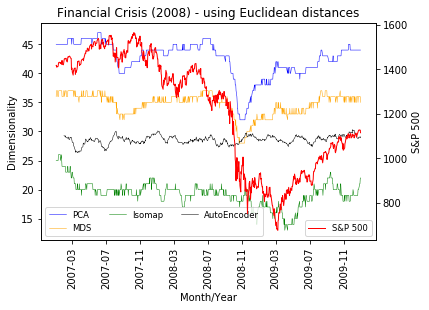

In [68]:
ts = pd.to_datetime(df['Dates'], format='%m/%d/%Y')
# df_new = df[(ts >= datetime.date(2007,1,1)) & (ts <= datetime.date(2009,12,31))]  
df_new = df[(ts >= pd.Timestamp(2007,1,1)) & (ts <= pd.Timestamp(2009,12,31))]  

ts_new = pd.to_datetime(df_new['Dates'], format='%m/%d/%Y')
fig, ax1 = plt.subplots(figsize=(6,4))
ax2 = ax1.twinx()

l1 = ax1.plot(ts_new, df_new['PCA_EIG_DIMS'], color='blue', label='PCA', linewidth=0.5)
l2 = ax1.plot(ts_new, df_new['MDS_EIG_DIMS'], color='orange', label='MDS', linewidth=0.5)
l3 = ax1.plot(ts_new, df_new['ISO_EIG_DIMS'], color='green', label='Isomap', linewidth=0.5) 
l4 = ax1.plot(ts_ae_new, df_ae_new['Z_SQR UPTO 90% MA'], color='black', label='AutoEncoder', linewidth=0.5) 
ax1.legend(loc='lower left', prop={'size': 8.5}, ncol=3)
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%m/%y'))

for tick in ax1.get_xticklabels():
    tick.set_rotation(90)
    
l4 = ax2.plot(ts_new, df_new['SP500'], color='red', label='S&P 500', linewidth=1.0) #linestyle=':'
ax2.legend(loc='lower right', prop={'size': 8.5})

ax1.set_title('Financial Crisis (2008) - using Euclidean distances')
ax1.set_xlabel('Month/Year')
ax1.set_ylabel('Dimensionality')
ax2.set_ylabel('S&P 500')

plt.show()

In [11]:
# fig.savefig(r'fin_crisis_geo.PNG')

Kullback Leibler Divergence

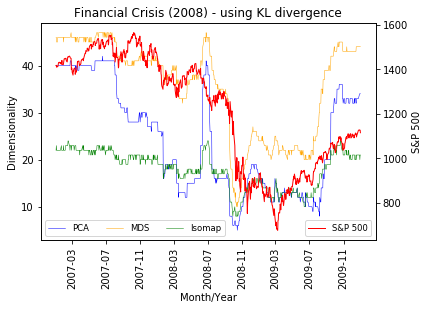

In [24]:
df_kl = pd.read_csv(r'russell3000_eod_KL_analysis.csv')
df_kl['PCA_SVD_RM'] = df_kl['PCA_SVD_DIMS'].rolling(window=30).mean()
df_kl['MDS_SVD_RM'] = df_kl['MDS_SVD_DIMS'].rolling(window=30).mean()
df_kl['ISO_SVD_RM'] = df_kl['ISO_SVD_DIMS'].rolling(window=30).mean()

df_kl['SP500_RM'] = df_kl['SP500'].rolling(window=30).mean()

ts = pd.to_datetime(df_kl['Dates'], format='%m/%d/%Y')
# df_new = df_kl[(ts >= datetime.date(2007,1,1)) & (ts <= datetime.date(2009,12,31))]  
df_new = df_kl[(ts >= pd.Timestamp(2007,1,1)) & (ts <= pd.Timestamp(2009,12,31))]  

ts_new = pd.to_datetime(df_new['Dates'], format='%m/%d/%Y')
fig, ax1 = plt.subplots(figsize=(6,4))
ax2 = ax1.twinx()
l1 = ax1.plot(ts_new, df_new['PCA_SVD_DIMS'], color='blue', label='PCA', linewidth=0.5)
l2 = ax1.plot(ts_new, df_new['MDS_SVD_DIMS'], color='orange', label='MDS', linewidth=0.5)
l3 = ax1.plot(ts_new, df_new['ISO_SVD_DIMS'], color='green', label='Isomap', linewidth=0.5)
ax1.legend(loc='lower left', prop={'size': 8.5}, ncol=3)
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%m/%y'))

for tick in ax1.get_xticklabels():
    tick.set_rotation(90)
    
l4 = ax2.plot(ts_new, df_new['SP500'], color='red', label='S&P 500', linewidth=1.0) # , linestyle=':'
ax2.legend(loc='lower right', prop={'size': 8.5})

ax1.set_title('Financial Crisis (2008) - using KL divergence')
ax1.set_xlabel('Month/Year')
ax1.set_ylabel('Dimensionality')
ax2.set_ylabel('S&P 500')

plt.show()

In [13]:
# fig.savefig(r'fin_crisis_kl.PNG')

#### Greek Debt Crisis 

Using Euclidean Distances

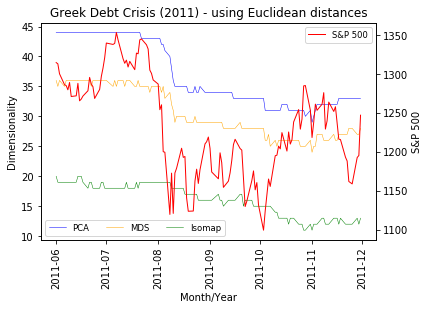

In [25]:
df = pd.read_csv(r'euclidean_60.csv')

df['PCA_EIG_RM'] = df['PCA_EIG_DIMS'].rolling(window=30).mean()
df['MDS_EIG_RM'] = df['MDS_EIG_DIMS'].rolling(window=30).mean()
df['ISO_EIG_RM'] = df['ISO_EIG_DIMS'].rolling(window=30).mean()

df['PCA_SVD_RM'] = df['PCA_SVD_DIMS'].rolling(window=30).mean()
df['MDS_SVD_RM'] = df['MDS_SVD_DIMS'].rolling(window=30).mean()
df['ISO_SVD_RM'] = df['ISO_SVD_DIMS'].rolling(window=30).mean()
df['SP500_RM'] = df['SP500'].rolling(window=30).mean()

df['PCA_SVD_VAR'] = df['PCA_SVD_DIMS'].rolling(window=30).var()
df['MDS_SVD_VAR'] = df['MDS_SVD_DIMS'].rolling(window=30).var()
df['ISO_SVD_VAR'] = df['ISO_SVD_DIMS'].rolling(window=30).var()

df['PCA_SVD_STD'] = df['PCA_SVD_DIMS'].rolling(window=30).std()
df['MDS_SVD_STD'] = df['MDS_SVD_DIMS'].rolling(window=30).std()
df['ISO_SVD_STD'] = df['ISO_SVD_DIMS'].rolling(window=30).std()

df['PCA_SVD_STD_RM'] = df['PCA_SVD_STD'].rolling(window=30).mean()
df['MDS_SVD_STD_RM'] = df['MDS_SVD_STD'].rolling(window=30).mean()
df['ISO_SVD_STD_RM'] = df['ISO_SVD_STD'].rolling(window=30).mean()

df['PCA_SVD_VAR_RM'] = df['PCA_SVD_VAR'].rolling(window=30).mean()
df['MDS_SVD_VAR_RM'] = df['MDS_SVD_VAR'].rolling(window=30).mean()
df['ISO_SVD_VAR_RM'] = df['ISO_SVD_VAR'].rolling(window=30).mean()

ts = pd.to_datetime(df['Dates'], format='%m/%d/%Y')
# df_new = df[(ts >= datetime.date(2011,6,1)) & (ts <= datetime.date(2011,11,30))]  
df_new = df[(ts >= pd.Timestamp(2011,6,1)) & (ts <= pd.Timestamp(2011,11,30))]  

ts_new = pd.to_datetime(df_new['Dates'], format='%m/%d/%Y')
fig, ax1 = plt.subplots(figsize=(6,4))
ax2 = ax1.twinx()

l1 = ax1.plot(ts_new, df_new['PCA_EIG_DIMS'], color='blue', label='PCA', linewidth=0.5)
l2 = ax1.plot(ts_new, df_new['MDS_EIG_DIMS'], color='orange', label='MDS', linewidth=0.5)
l3 = ax1.plot(ts_new, df_new['ISO_EIG_DIMS'], color='green', label='Isomap', linewidth=0.5) 
ax1.legend(loc='lower left', prop={'size': 8.5}, ncol=3)
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%m/%y'))

for tick in ax1.get_xticklabels():
    tick.set_rotation(90)

l4 = ax2.plot(ts_new, df_new['SP500'], color='red', label='S&P 500', linewidth=1.0) # , linestyle=':'
ax2.legend(loc='upper right', prop={'size': 8.5})

ax1.set_title('Greek Debt Crisis (2011) - using Euclidean distances')

ax1.set_xlabel('Month/Year')
ax1.set_ylabel('Dimensionality')
ax2.set_ylabel('S&P 500')

plt.show()

In [15]:
# fig.savefig(r'greek_crisis_geo.PNG')

Kullback Leibler Divergence

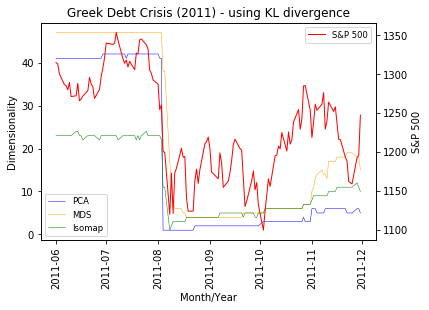

In [26]:
df_kl = pd.read_csv(r'russell3000_eod_KL_analysis.csv')
df_kl['PCA_SVD_RM'] = df_kl['PCA_SVD_DIMS'].rolling(window=30).mean()
df_kl['MDS_SVD_RM'] = df_kl['MDS_SVD_DIMS'].rolling(window=30).mean()
df_kl['ISO_SVD_RM'] = df_kl['ISO_SVD_DIMS'].rolling(window=30).mean()

df_kl['SP500_RM'] = df_kl['SP500'].rolling(window=30).mean()

ts = pd.to_datetime(df_kl['Dates'], format='%m/%d/%Y')
# df_new = df_kl[(ts >= datetime.date(2011,6,1)) & (ts <= datetime.date(2011,11,30))]  
df_new = df_kl[(ts >= pd.Timestamp(2011,6,1)) & (ts <= pd.Timestamp(2011,11,30))]  

ts_new = pd.to_datetime(df_new['Dates'], format='%m/%d/%Y')
fig, ax1 = plt.subplots(figsize=(6,4))
ax2 = ax1.twinx()
l1 = ax1.plot(ts_new, df_new['PCA_SVD_DIMS'], color='blue', label='PCA', linewidth=0.5)
l2 = ax1.plot(ts_new, df_new['MDS_SVD_DIMS'], color='orange', label='MDS', linewidth=0.5)
l3 = ax1.plot(ts_new, df_new['ISO_SVD_DIMS'], color='green', label='Isomap', linewidth=0.5)
ax1.legend(loc='lower left', prop={'size': 8.5})
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%m/%y'))

for tick in ax1.get_xticklabels():
    tick.set_rotation(90)

l4 = ax2.plot(ts_new, df_new['SP500'], color='red', label='S&P 500', linewidth=1.0) # linestyle=':'
ax2.legend(loc='upper right', prop={'size': 8.5})

ax1.set_title('Greek Debt Crisis (2011) - using KL divergence')
ax1.set_xlabel('Month/Year')
ax1.set_ylabel('Dimensionality')
ax2.set_ylabel('S&P 500')

plt.show()

In [17]:
# fig.savefig(r'greek_crisis_kl.PNG')

#### Ticker Count Time Series 

In [18]:
df_tickers = pd.read_excel('ticker_count_ts.xlsx')
df_tickers.set_index(df_tickers['Dates'], inplace=True)
df_tickers.drop('Dates', axis=1, inplace=True)

In [19]:
df_tickers.head()

Count
Dates            
1986-03-27    335
1986-03-31    335
1986-04-01    335
1986-04-02    335
1986-04-03    335

Text(0.5,1,'# of Tickers')

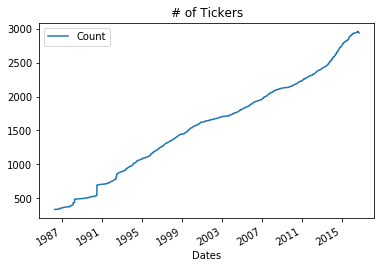

In [20]:
p = df_tickers.plot()
p.set_title('# of Tickers')

#### Auto Encoders with Returns and RPCA+Returns

In [69]:
def calculate_moving_avg(df_, ma_days=10):
    df_['GTE 1% MA'] = df_['GTE 1%'].rolling(window=ma_days).mean()
    df_['UPTO 90% MA'] = df_['UPTO 90%'].rolling(window=ma_days).mean()
    df_['Z_SQR GTE 1% MA'] = df_['Z_SQR GTE 1%'].rolling(window=ma_days).mean()
    df_['Z_SQR UPTO 90% MA'] = df_['Z_SQR UPTO 90%'].rolling(window=ma_days).mean()
    return df_    

In [70]:
df_ae_ret = pd.read_csv(r'ae/summary_ae-lambda-1e-8.csv')
df_ae_rpca_ret = pd.read_csv(r'ae/summary_rpca_ae.csv')

df_ae_ret = calculate_moving_avg(df_ae_ret, ma_days=10)
df_ae_rpca_ret = calculate_moving_avg(df_ae_rpca_ret, ma_days=10)

In [74]:
ts_ae = pd.to_datetime(df_ae_ret['Date'], format='%Y-%m-%d')
df_ae_ret_new = df_ae_ret[(ts_ae >= pd.Timestamp(2007,1,1)) & (ts_ae <= pd.Timestamp(2009,12,31))]  
# df_ae_rpca_ret_new = df_ae_rpca_ret[(ts_ae >= pd.Timestamp(2007,1,1)) & (ts_ae <= pd.Timestamp(2009,12,31))]  
ts_ae_new = pd.to_datetime(df_ae_ret_new['Date'], format='%Y-%m-%d')

In [75]:
df_ae_ret_new.head()

Date  GTE 1%  UPTO 90%  Z_SQR GTE 1%  Z_SQR UPTO 90%  \
1669  2007-01-03      40        42            25              29   
1670  2007-01-04      40        41            30              29   
1671  2007-01-05      40        43            27              29   
1672  2007-01-08      39        43            22              28   
1673  2007-01-09      33        39            21              20   

      GT_THRESHOLD  Adj Close  GTE 1% MA  UPTO 90% MA  Z_SQR GTE 1% MA  \
1669            49    1416.60       37.4         40.2             25.1   
1670            48    1418.34       38.0         40.2             25.9   
1671            50    1409.71       38.0         40.4             25.8   
1672            53    1412.84       37.9         40.7             25.3   
1673            44    1412.11       37.4         40.4             24.7   

      Z_SQR UPTO 90% MA  
1669               26.3  
1670               26.7  
1671               26.7  
1672               26.8  
1673               25.9

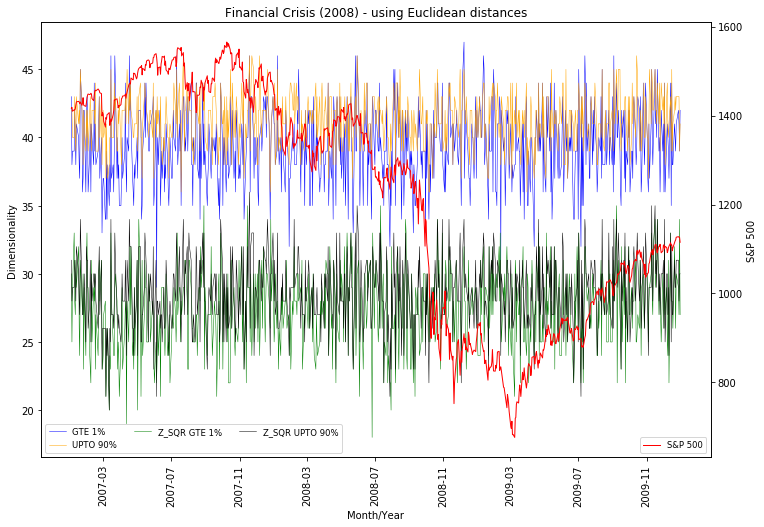

In [78]:
# ts = pd.to_datetime(df['Dates'], format='%m/%d/%Y')
# df_new = df[(ts >= datetime.date(2007,1,1)) & (ts <= datetime.date(2009,12,31))]  
# df_new = df[(ts >= pd.Timestamp(2007,1,1)) & (ts <= pd.Timestamp(2009,12,31))]  

# ts_new = pd.to_datetime(df_new['Dates'], format='%m/%d/%Y')
fig, ax1 = plt.subplots(figsize=(12,8))
ax2 = ax1.twinx()

# l1 = ax1.plot(ts_new, df_new['PCA_EIG_DIMS'], color='blue', label='PCA', linewidth=0.5)
# l2 = ax1.plot(ts_new, df_new['MDS_EIG_DIMS'], color='orange', label='MDS', linewidth=0.5)
# l3 = ax1.plot(ts_new, df_new['ISO_EIG_DIMS'], color='green', label='Isomap', linewidth=0.5) 
l1 = ax1.plot(ts_ae_new, df_ae_new['GTE 1%'], color='blue', label='GTE 1%', linewidth=0.5) 
l2 = ax1.plot(ts_ae_new, df_ae_new['UPTO 90%'], color='orange', label='UPTO 90%', linewidth=0.5) 
l3 = ax1.plot(ts_ae_new, df_ae_new['Z_SQR GTE 1%'], color='green', label='Z_SQR GTE 1%', linewidth=0.5) 
l4 = ax1.plot(ts_ae_new, df_ae_new['Z_SQR UPTO 90%'], color='black', label='Z_SQR UPTO 90%', linewidth=0.5) 
ax1.legend(loc='lower left', prop={'size': 8.5}, ncol=3)
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%m/%y'))

for tick in ax1.get_xticklabels():
    tick.set_rotation(90)
    
l5 = ax2.plot(ts_new, df_new['SP500'], color='red', label='S&P 500', linewidth=1.0) #linestyle=':'
ax2.legend(loc='lower right', prop={'size': 8.5})

ax1.set_title('Financial Crisis (2008) - using Euclidean distances')
ax1.set_xlabel('Month/Year')
ax1.set_ylabel('Dimensionality')
ax2.set_ylabel('S&P 500')

plt.show()